In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('pollution_india_2010.csv')

non_df=df.replace('Null',np.nan).dropna(axis=0)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 5 columns):
City     181 non-null object
NO2      181 non-null object
PM10     181 non-null object
SO2      181 non-null object
State    181 non-null object
dtypes: object(5)
memory usage: 3.6+ KB


In [4]:
non_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175 entries, 0 to 180
Data columns (total 5 columns):
City     175 non-null object
NO2      175 non-null object
PM10     175 non-null object
SO2      175 non-null object
State    175 non-null object
dtypes: object(5)
memory usage: 4.8+ KB


In [5]:
non_df[['NO2','PM10','SO2']]=non_df[['NO2','PM10','SO2']].astype('int')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 5 columns):
City     181 non-null object
NO2      181 non-null object
PM10     181 non-null object
SO2      181 non-null object
State    181 non-null object
dtypes: object(5)
memory usage: 3.6+ KB


In [7]:
df.head()

,City,NO2,PM10,SO2,State
0,Chitoor,9,39,4,Andhra Pradesh
1,Guntur,11,81,2,Andhra Pradesh
2,Hydrabad,24,79,5,Andhra Pradesh
3,Kothagudem,11,62,2,Andhra Pradesh
4,Kurnool,9,85,4,Andhra Pradesh


## Data Analysis

### 1. Top 10 CITY Releaser

In [18]:
state_wise=non_df[['City','NO2']]
top_state_releaser=state_wise.sort_values(by='NO2',axis=0,ascending=False)[:10]
print(top_state_releaser)

               City  NO2
176          Howrah   75
173     Barrackpore   74
99         Badlapur   73
115      Ulhasnagar   68
174        Durgapur   66
172         Asansol   66
179        Sankrail   65
178        Raniganj   63
177         Kolkata   62
180  South Suburban   56


In [19]:
import seaborn as sn
sn.set(style="whitegrid" , rc={'figure.figsize':(10,5)} , palette = "Blues")

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

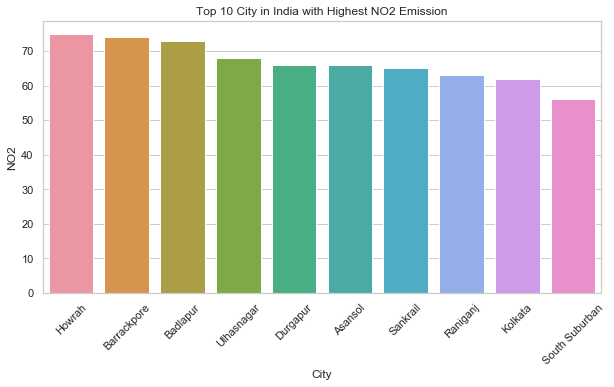

In [20]:
sn.barplot(x='City',y='NO2',data=top_state_releaser)
plt.title("Top 10 City in India with Highest NO2 Emission")
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

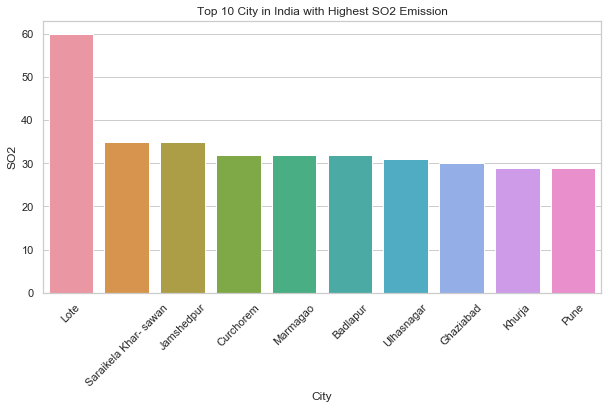

In [58]:
city_wise_SO2=non_df[['City','SO2']]

top_city_SO2=city_wise_SO2.sort_values(by="SO2",axis=0,ascending=False)[:10]

sn.barplot(x='City',y='SO2',data=top_city_SO2)
plt.title("Top 10 City in India with Highest SO2 Emission")
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

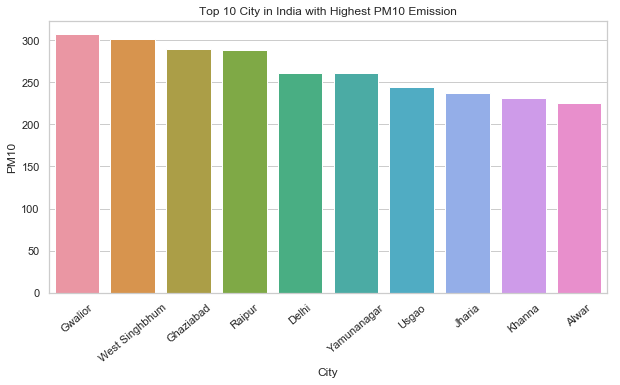

In [56]:
city_wise_PM10=non_df[['City','PM10']]
top_city_PM10=city_wise_PM10.sort_values(by="PM10",axis=0,ascending=False)[:10]

sn.barplot(x='City',y='PM10',data=top_city_PM10)
plt.title("Top 10 City in India with Highest PM10 Emission")
plt.xticks(rotation=40)

## Top 10 State Releaser 

In [27]:
state_releaser=pd.DataFrame(non_df.groupby('State')['NO2','PM10','SO2'].mean().reset_index())
state_releaser.head()

,State,NO2,PM10,SO2
0,Andhra Pradesh,14.076923,68.692308,4.615385
1,Assam,14.750000,69.500000,6.166667
2,Bihar,40.000000,181.000000,7.000000
3,Chandigarh,16.000000,92.000000,2.000000
4,Chattisgarh,28.666667,167.333333,12.333333


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 <a list of 29 Text xticklabel objects>)

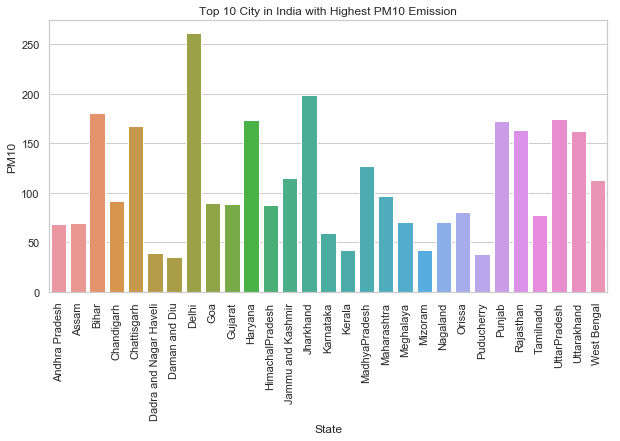

In [34]:
sn.barplot(x='State',y='PM10',data=state_releaser)
plt.title("Top 10 City in India with Highest PM10 Emission")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 <a list of 29 Text xticklabel objects>)

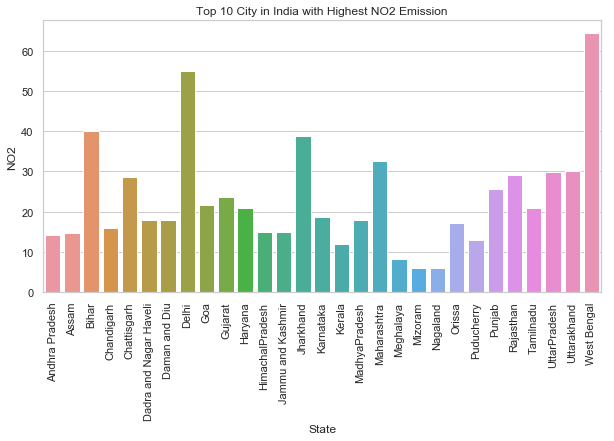

In [30]:
sn.barplot(x='State',y='NO2',data=state_releaser)
plt.title("Top 10 City in India with Highest NO2 Emission")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 <a list of 29 Text xticklabel objects>)

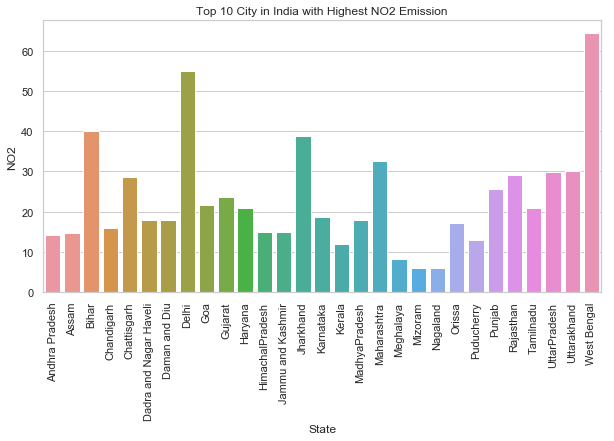

In [32]:
sn.barplot(x='State',y='NO2',data=state_releaser)
plt.title("Top 10 City in India with Highest NO2 Emission")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 <a list of 29 Text xticklabel objects>)

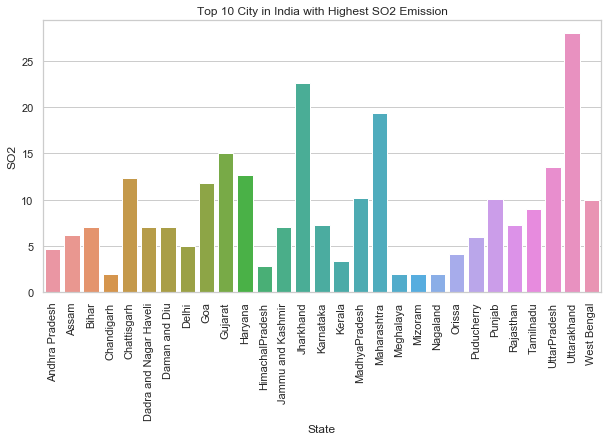

In [35]:
sn.barplot(x='State',y='SO2',data=state_releaser)
plt.title("Top 10 City in India with Highest SO2 Emission")
plt.xticks(rotation=90)

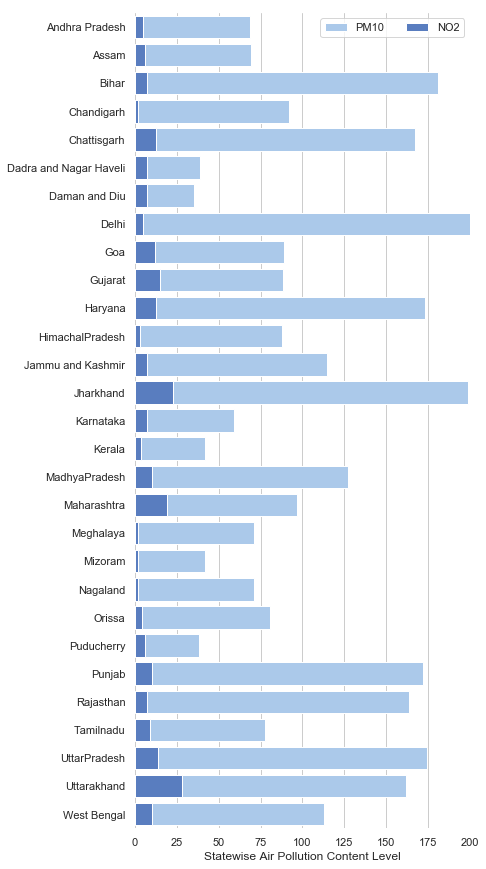

In [49]:
f, ax = plt.subplots(figsize=(6, 15))
sn.set_color_codes('pastel')
sn.barplot(x='PM10',y='State',data=state_releaser,color='b',label='PM10')
sn.set_color_codes('muted')
sn.barplot(x='SO2',y='State',data=state_releaser,label='NO2',color='b')

ax.legend(ncol=2, loc="best", frameon=True)
ax.set(xlim=(0, 200), ylabel="",xlabel="Statewise Air Pollution Content Level")
sn.despine(left=True, bottom=True)

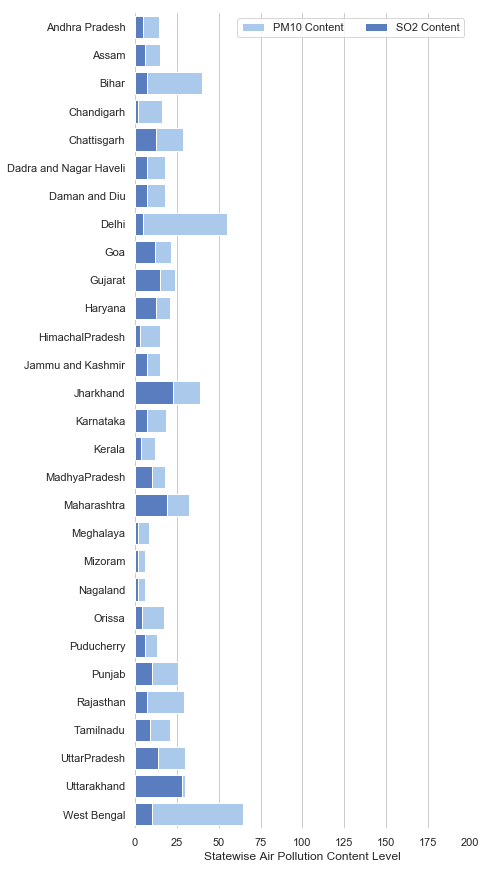

In [51]:
f, ax = plt.subplots(figsize=(6, 15))

sn.set_color_codes("pastel")
sn.barplot(x = "NO2" , y= "State" , data = state_releaser, label = "PM10 Content" , color = "b" )
sn.set_color_codes("muted")
sn.barplot(x = "SO2" , y= "State", data = state_releaser, label = "SO2 Content" , color = "b")


ax.legend(ncol=2, loc="best", frameon=True)
ax.set(xlim=(0, 200), ylabel="",xlabel="Statewise Air Pollution Content Level")
sn.despine(left=True, bottom=True)

Text(0.5, 1.0, 'Statewise NO2, SO2, PM10 Level')

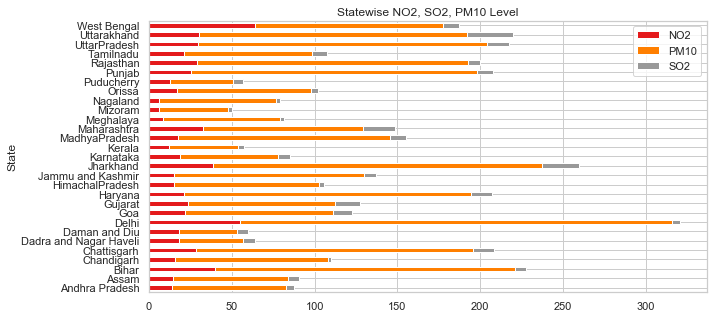

In [44]:
state_releaser.set_index('State').plot(kind='barh', stacked=True , cmap = "Set1" )
plt.title("Statewise NO2, SO2, PM10 Level")

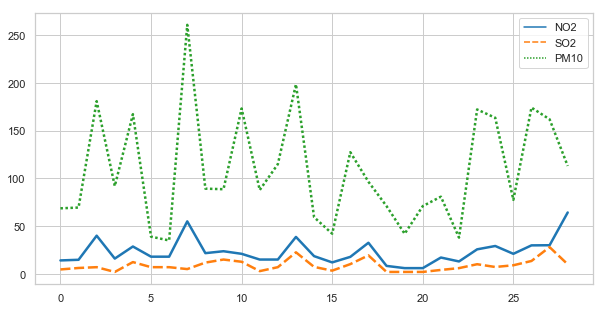

In [55]:
sn.lineplot(data=state_releaser[['NO2','SO2','PM10']],palette='tab10',linewidth=2.5)

Text(0.5, 1.0, 'NO2, PM10, SO2')

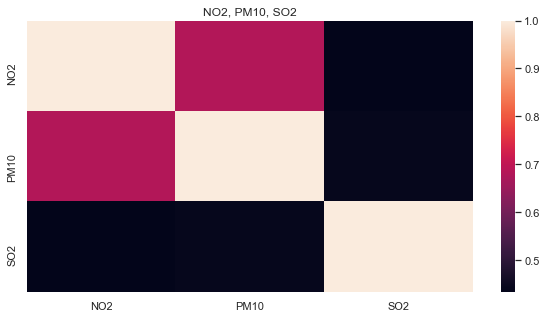

In [25]:
sn.heatmap(state_releaser.corr())
plt.title("NO2, PM10, SO2")

### Least Emit Top 10 State 

          City  NO2
76   Alappuzha    5
81   Malapuram    5
122     Kohima    5
82    Palakkad    6
94       Satna    6
117      Dawki    6
120     Aizawl    6
121    Dimapur    7
84     Thissur    7
74   Mangalore    8


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

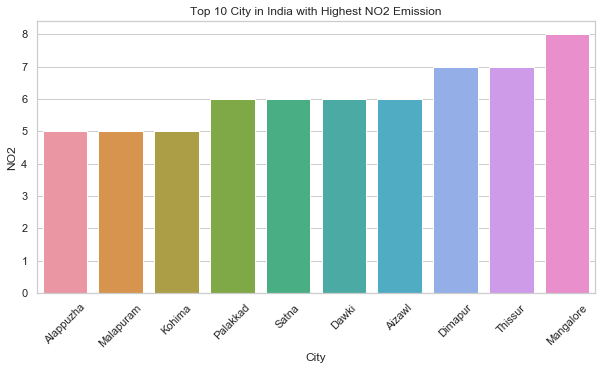

In [60]:
state_wises=non_df[['City','NO2']]
top_state_releaser_des=state_wises.sort_values(by='NO2',axis=0,ascending=True)[:10]
print(top_state_releaser_des)
sn.barplot(x='City',y='NO2',data=top_state_releaser_des)
plt.title("Top 10 City in India with Highest NO2 Emission")
plt.xticks(rotation=45)